In [1]:
import os
from pathlib import Path

testfolder = os.path.join('TEMP','PotatoY1-Y3')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in TEMP\PotatoY1-Y3


In [2]:
from bifacial_radiance import *
import numpy as np
import pandas as pd
import datetime
import pvlib


In [3]:
# This information helps with debugging and getting support :)
import sys, platform
import bifacial_radiance as br
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("PVLib version ", pvlib.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
bifacial_radiance version  0.4.2+236.g6801d3d.dirty
PVLib version  0.10.4.dev9+ge92ee94


In [4]:
startdt = datetime.datetime(2001,3,15,0)
enddt = datetime.datetime(2001,6,30,23)

In [5]:
NREL_API_KEY = None  # <-- please set your NREL API key here
# note you must use "quotes" around your key as it is a string.

if NREL_API_KEY is None:
       NREL_API_KEY = 'DEMO_KEY'  # OK for this demo, but better to get your own key

In [6]:
#Site 1
#44.57615187732146,-123.23914850912513
lat_1=44.57615187732146
lon_1=-123.23914850912513
lat_2=44.566202648983094
lon_2=-123.30914089141844
#Site 2

In [7]:
data2019_S1, metdata2019_S1 = pvlib.iotools.get_psm3(
    latitude=lat_1, longitude=lon_1,
    api_key=NREL_API_KEY,
    email='silvana.ovaitt@nrel.gov',  # <-- any email works here fine
    names='2019', map_variables=True, leap_day=False)

data2020_S1, metdata2020_S1 = pvlib.iotools.get_psm3(
    latitude=lat_1, longitude=lon_1,
    api_key=NREL_API_KEY,
    email='silvana.ovaitt@nrel.gov',  # <-- any email works here fine
    names='2020', map_variables=True, leap_day=False)

data2021_S1, metdata2021_S1 = pvlib.iotools.get_psm3(
    latitude=lat_1, longitude=lon_1,
    api_key=NREL_API_KEY,
    email='silvana.ovaitt@nrel.gov',  # <-- any email works here fine
    names='2021', map_variables=True, leap_day=False)

In [8]:
data2019_S2, metdata2019_S2 = pvlib.iotools.get_psm3(
latitude=lat_2, longitude=lon_2,
api_key=NREL_API_KEY,
email='silvana.ovaitt@nrel.gov',  # <-- any email works here fine
names='2019', map_variables=True, leap_day=False)

data2020_S2, metdata2020_S2 = pvlib.iotools.get_psm3(
latitude=lat_2, longitude=lon_2,
api_key=NREL_API_KEY,
email='silvana.ovaitt@nrel.gov',  # <-- any email works here fine
names='2020', map_variables=True, leap_day=False)

data2021_S2, metdata2021_S2 = pvlib.iotools.get_psm3(
latitude=lat_2, longitude=lon_2,
api_key=NREL_API_KEY,
email='silvana.ovaitt@nrel.gov',  # <-- any email works here fine
names='2021', map_variables=True, leap_day=False)


In [9]:
data2019_S1.to_csv('data2019_S1.csv')
data2020_S1.to_csv('data2020_S1.csv')
data2021_S1.to_csv('data2021_S1.csv')

data2019_S2.to_csv('data2019_S2.csv')
data2020_S2.to_csv('data2020_S2.csv')
data2021_S2.to_csv('data2021_S2.csv')

In [10]:
lat_site1 = 44.57615187732146   
lon_site2 = -123.23914850912513
clearance_heights = [0.88, 0.9482582, 0.6985] # m
ygaps = [0.02, 0.02, 0.02] # m
cws = [3.3655, 3.3655, 3.9624] # m
rtrs = [6.223, 8.4201, 6.8453] # m
tilt = 25
sazm = 180
albedo = 0.2 # 'grass'
years=[2019,2020,2021]
datasets_S2 = [data2019_S2, data2020_S2, data2021_S2]
metdataset_S2 = [metdata2019_S2, metdata2020_S2, metdata2021_S2]

datasets_S1 = [data2019_S1, data2020_S1, data2021_S1]
metdataset_S1 = [metdata2019_S1, metdata2020_S2, metdata2021_S1]

# Field size. Just going for 'steady state'
nMods = 20
nRows = 7

In [11]:
startdts = [datetime.datetime(2001,4,1,0),
            datetime.datetime(2001,5,1,0),
            datetime.datetime(2001,6,1,0),
            datetime.datetime(2001,7,1,0),
            datetime.datetime(2001,8,1,0),
            datetime.datetime(2001,9,1,0),
            datetime.datetime(2001,10,1,0),
            datetime.datetime(2001,4,1,0)]

enddts = [datetime.datetime(2001,4,30,23),
          datetime.datetime(2001,5,31,23),
          datetime.datetime(2001,6,30,23),
          datetime.datetime(2001,7,31,23),
          datetime.datetime(2001,8,31,23),
          datetime.datetime(2001,9,30,23),
          datetime.datetime(2001,10,15,0),
          datetime.datetime(2001,10,15,0)]


In [12]:
demo = RadianceObj('oregon', path=testfolder)
demo.setGround(0.2)

path = TEMP\PotatoY1-Y3
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.


## 2. Read and compile values

In [13]:
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [14]:
font = {#'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

#sns.set(rc={'figure.figsize':(5.7,4.27)})

In [15]:
testfolder

'TEMP\\PotatoY1-Y3'

In [16]:
results_BGG=[]
results_GFront=[]
results_GRear=[]
results_GGround=[]
results_coordY=[]
setups = []

GHIs = []
year_strs = []
startm = []
endm = []


for setup in range(0, 2):
    for year in range(0, 3):
        for mmonth in range(0, len(startdts)):

            year_str = years[year]
            startdt = startdts[mmonth]
            enddt = enddts[mmonth]    

            if setup==0:
                weather = datasets_S1[year]
                meta = metdataset_S1[year]
            else:
                weather = datasets_S2[year]
                meta = metdataset_S2[year]
                    
            metdata = demo.NSRDBWeatherData(meta, weather,starttime=startdt, endtime=enddt, coerce_year=2001) # read in the EPW weather data from above
            GHIs.append(metdata.ghi.sum())

            # irr_GROUND_Month_6_setup_1_Row4_Module10_Back.csv
            fileground= os.path.join('results', f'irr_GROUND_setup_'+str(setup+1)+'_'+str(year_str)+'_'+str(startdt.month)+'to'+str(enddt.month)+'__Row4_Module10_Front.csv')
            filepv= os.path.join('results', f'irr_MODULE_setup_'+str(setup+1)+'_'+str(year_str)+'_'+str(startdt.month)+'to'+str(enddt.month)+'__Row4_Module10.csv')
            resultsGround = load.read1Result(fileground)
            resultsPV = load.read1Result(filepv)
            #  resultsDF = load.cleanResult(resultsDF).dropna() # I checked them they are good because even number of sensors
            results_GGround.append(list(resultsGround['Wm2Front']))
            results_coordY.append(list(resultsGround['y']))
            results_GFront.append(list(resultsPV['Wm2Front']))
            results_GRear.append(list(resultsPV['Wm2Back']))
            results_BGG.append(resultsPV['Wm2Back'].sum()*100/resultsPV['Wm2Front'].sum())

            year_strs.append(year_str)
            startm.append(startdt.month)
            endm.append(enddt.month)
            setups.append(setup+1)

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2001
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for center labeled data, at exact timestamp in input Weather File
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2001
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for center labeled data, at exact timestamp in input Weather File
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2001
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for center labeled data, at exact 

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2001
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for center labeled data, at exact timestamp in input Weather File
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2001
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for center labeled data, at exact timestamp in input Weather File
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2001
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for center labeled data, at exact 

In [17]:
df = pd.DataFrame(list(zip(year_strs, setups, startm, endm, GHIs, results_coordY, results_GGround,
                          results_GFront, results_GRear, results_BGG)),
               columns =['Year', 'Setup', 'Start Month', 'End Month', 'GHI', 'GroundCoordY', 'Gground', 'Gfront', 'Grear', 'BGG'])

In [18]:
df[['BedA','BedB']] = pd.DataFrame(df.Gground.tolist(), index= df.index)

In [19]:
df.to_csv('Results_DF_Potato.csv')

In [20]:
# Example of selectiong one setup one month
df[(df['Setup']==2) & (df['Start Month']==5)]

,Year,Setup,Start Month,End Month,GHI,GroundCoordY,Gground,Gfront,Grear,BGG,BedA,BedB
25,2019,2,5,5,191311.0,"[2.414089, 4.192089]","[101298.7, 179292.6]","[192376.3, 192732.9, 193089.1, 196380.5, 19661...","[18030.79, 15185.64, 14577.36, 14162.78, 14524...",8.291496,101298.70,179292.6
33,2020,2,5,5,162526.0,"[2.414089, 4.192089]","[91555.06, 151832.8]","[161696.9, 162100.7, 162073.6, 162386.1, 16269...","[15458.35, 13860.04, 13131.23, 13090.21, 13005...",8.969258,91555.06,151832.8
41,2021,2,5,5,191911.0,"[2.414089, 4.192089]","[108180.7, 183715.0]","[193476.20000000004, 193849.5, 194222.20000000...","[18839.79, 16211.72, 15050.94, 14494.46, 14456...",8.773689,108180.70,183715.0


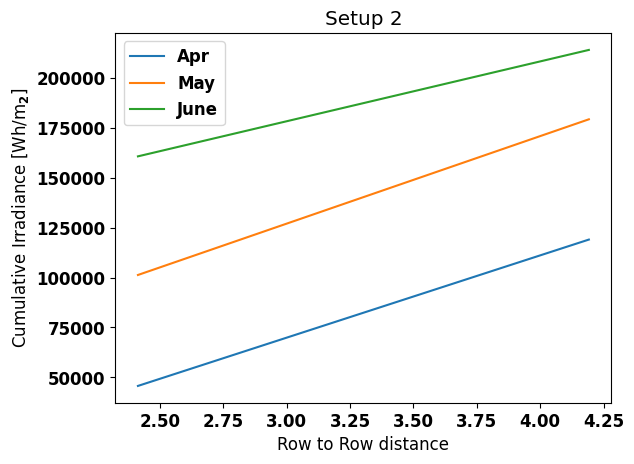

In [22]:
foo = df[(df['Setup']==2) & (df['Start Month']==4) & (df['End Month']==4)]
foo1 = df[(df['Setup']==2) & (df['Start Month']==5)]
foo2 = df[(df['Setup']==2) & (df['Start Month']==6)]

plt.plot(foo['GroundCoordY'].iloc[0], foo['Gground'].iloc[0], label='Apr')
plt.plot(foo['GroundCoordY'].iloc[0], foo1['Gground'].iloc[0], label='May')
plt.plot(foo['GroundCoordY'].iloc[0], foo2['Gground'].iloc[0], label='June')
plt.title('Setup 2')
plt.xlabel('Row to Row distance')
plt.ylabel('Cumulative Irradiance [Wh/m$_2$]')
plt.legend()

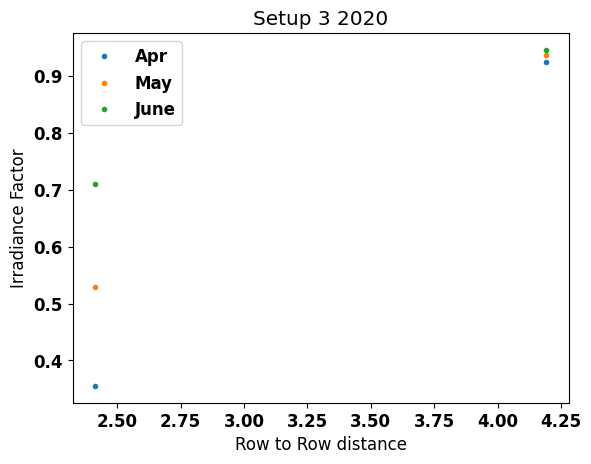

In [23]:
foo = df[(df['Setup']==2) & (df['Start Month']==4) & (df['End Month']==4)]
foo1 = df[(df['Setup']==2) & (df['Start Month']==5)]
foo2 = df[(df['Setup']==2) & (df['Start Month']==6)]

plt.plot(foo['GroundCoordY'].iloc[0], foo['Gground'].iloc[0]/foo['GHI'].iloc[0], '.', label='Apr')
plt.plot(foo['GroundCoordY'].iloc[0], foo1['Gground'].iloc[0]/foo1['GHI'].iloc[0], '.', label='May')
plt.plot(foo['GroundCoordY'].iloc[0], foo2['Gground'].iloc[0]/foo2['GHI'].iloc[0], '.', label='June')
plt.title('Setup 3 2020')
plt.xlabel('Row to Row distance')
plt.ylabel('Irradiance Factor')
plt.legend();

<Axes: >

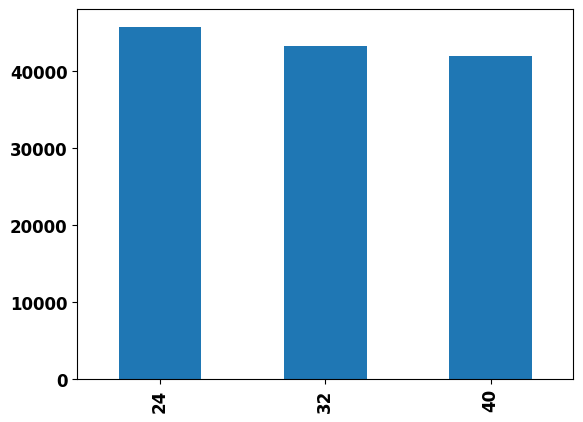

In [24]:
foo = df[(df['Setup']==2) & (df['Start Month']==4) & (df['End Month']==4)]
foo['BedA'].plot.bar()

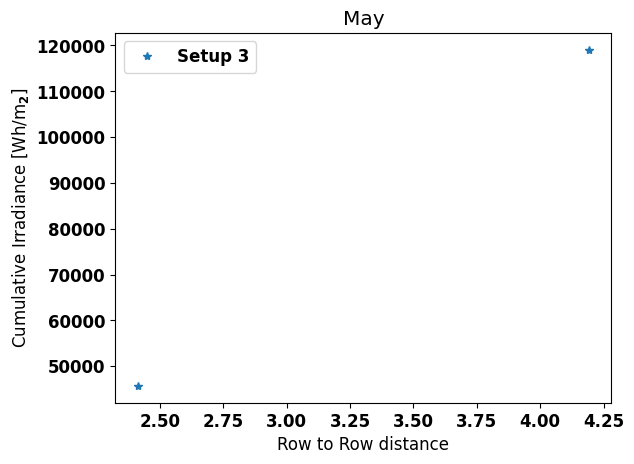

In [25]:
foo2 = df[(df['Setup']==2) & (df['Start Month']==4) & (df['End Month']==4)]

plt.plot(foo2['GroundCoordY'].iloc[0], foo2['Gground'].iloc[0], '*', label='Setup 3')
plt.title('May')
plt.xlabel('Row to Row distance')
plt.ylabel('Cumulative Irradiance [Wh/m$_2$]')
plt.legend();

<Axes: >

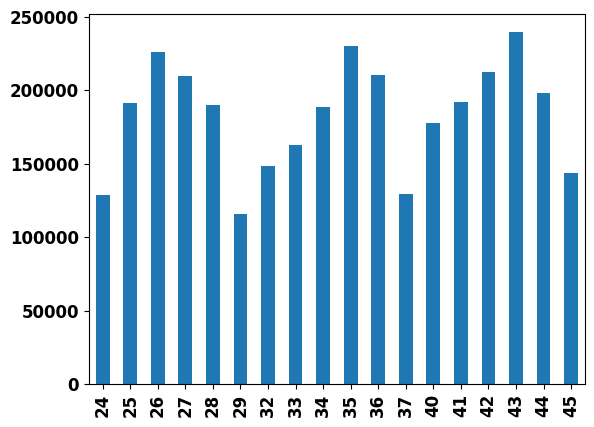

In [26]:
foo = df[(df['Setup']==2) & (df['End Month']!=10)] # & (df['Start Month']==4) & (df['End Month']==4)]
foo['GHI'].plot.bar()

# Weather Files PLOTTING

In [27]:
from matplotlib.dates import DateFormatter

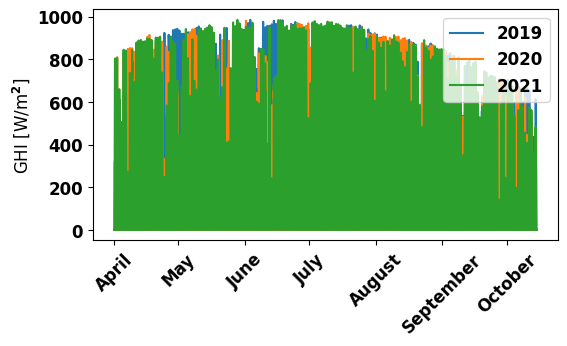

In [28]:
startdt = '2001-04-01 00:30:00-08:00'
enddt = '2001-10-15 00:30:00-08:00'
foo = data2019_S2[(data2019_S2.index>startdt)&(data2019_S2.index<enddt)]
foo2 = data2020_S2[(data2020_S2.index>startdt)&(data2020_S2.index<enddt)]#
foo3 = data2021_S2[(data2021_S2.index>startdt)&(data2021_S2.index<enddt)]#

#foo.index = foo.index.strftime('%m-%d %h')
#foo2.index = foo2.index.strftime('%m-%d %h')

fig, ax = plt.subplots(figsize=(6, 3))
plt.plot(foo.GHI, label='2019')
plt.plot(foo2.GHI, label='2020')
plt.plot(foo3.GHI, label='2021')

plt.xticks(rotation=45)
plt.legend()
plt.ylabel('GHI [W/m$^2$]')
# Define the date format
date_form = DateFormatter("%B")
ax.xaxis.set_major_formatter(date_form)
#ax.set_major_formatter(mdates.DateFormatter('%B'))